In [32]:
!pip install pandas numpy nltk scikit-learn matplotlib seaborn


In [33]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [34]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
data = {
    'text': [
        'I love this product!',
        'This is the worst thing ever.',
        'Average experience.',
        'Excellent quality and fast delivery!',
        'Not good at all',
        'Totally satisfied with the service',
        'Will not recommend this to anyone',
        'Okay product, could be better.'
    ],
    'sentiment': [
        'positive',
        'negative',
        'neutral',
        'positive',
        'negative',
        'positive',
        'negative',
        'neutral'
    ]
}
df = pd.DataFrame(data)
df.head()


,text,sentiment
0,I love this product!,positive
1,This is the worst thing ever.,negative
2,Average experience.,neutral
3,Excellent quality and fast delivery!,positive
4,Not good at all,negative


In [36]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']]


,text,cleaned_text
0,I love this product!,love product
1,This is the worst thing ever.,worst thing ever
2,Average experience.,averag experi
3,Excellent quality and fast delivery!,excel qualiti fast deliveri
4,Not good at all,good
5,Totally satisfied with the service,total satisfi servic
6,Will not recommend this to anyone,recommend anyon
7,"Okay product, could be better.",okay product could better


In [37]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [39]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

Accuracy Score: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
 [[1 0]
 [1 0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



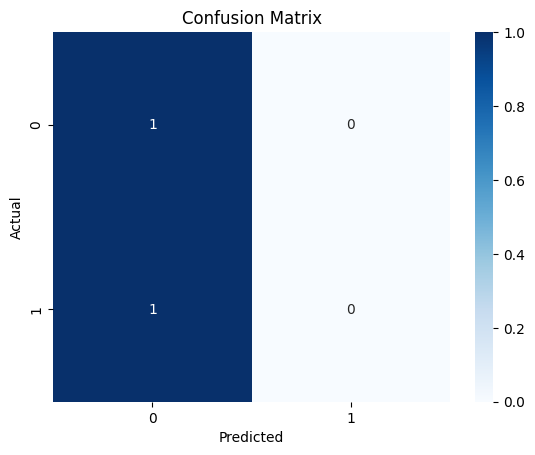

In [40]:
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [41]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vect = vectorizer.transform([cleaned])
    return model.predict(vect)[0]

print(predict_sentiment("This is amazing, I loved it!"))
print(predict_sentiment("Worst experience ever."))


positive
neutral
